In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Contours

### 1.1 Finding and Drawing Contours

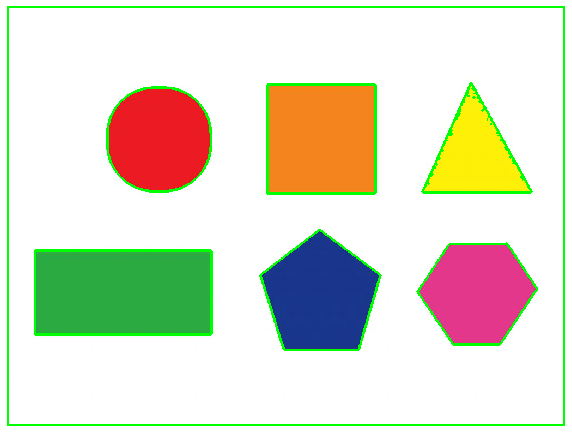

In [8]:
image = cv2.imread('../img/shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,220,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

clone = image.copy()
clone = cv2.drawContours(clone, contours, -1, (0,255,0), 3)
show_image(np.flip(clone, axis=2))



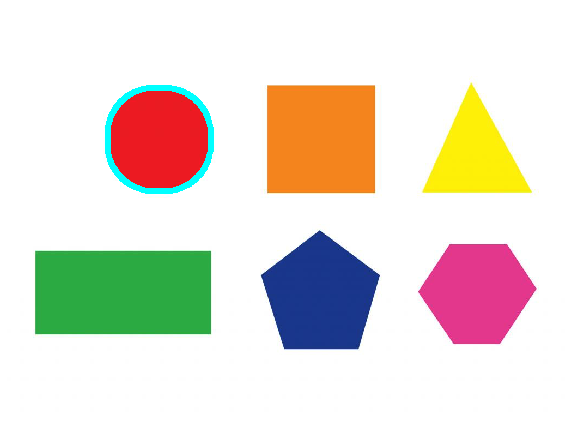

In [9]:
clone = image.copy()
cnt = contours[4]
clone = cv2.drawContours(clone.copy(), [cnt], 0, (255,255,0), 10)
show_image(np.flip(clone, axis=2))

### 1.2 Basic Contour Features

#### 1.2.1 Contour Area and Perimeter

Contour #1 -- area: 6008.00, perimeter: 449.82


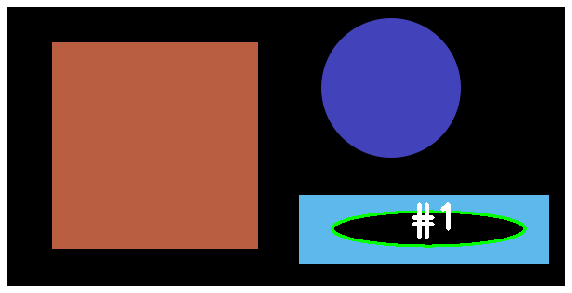

Contour #2 -- area: 19564.00, perimeter: 682.00


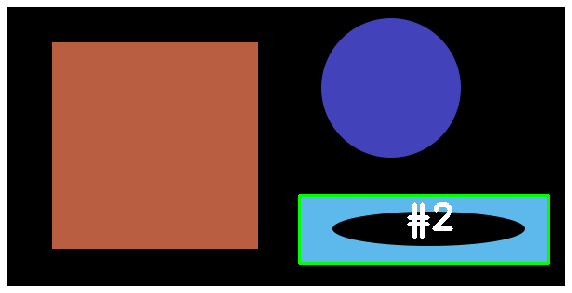

Contour #3 -- area: 48841.00, perimeter: 884.00


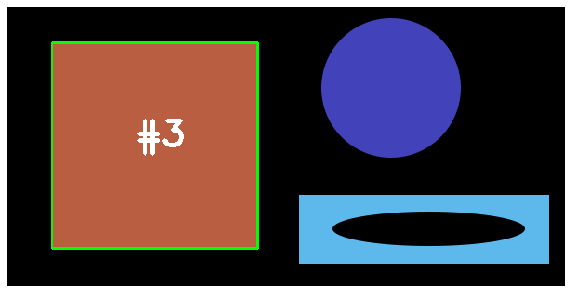

Contour #4 -- area: 17647.00, perimeter: 495.24


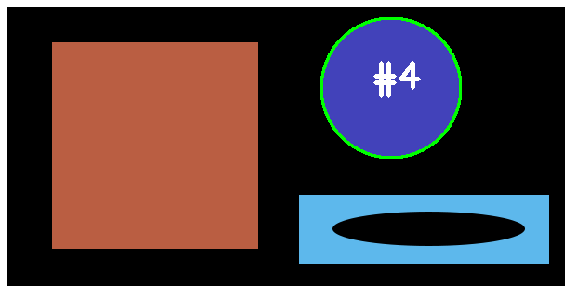

In [10]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0] #in the latest version of cv2, there are only two properties in findcontours (i.e. contours, hierarchy)

cnt = contours[1]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

# loop over the contours again
for (i, c) in enumerate(contours):
    # compute the area and the perimeter of the contour
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    clone = image.copy()
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    show_image(clone)

#### 1.2.4 Contour Bounding Boxes

Contour #1


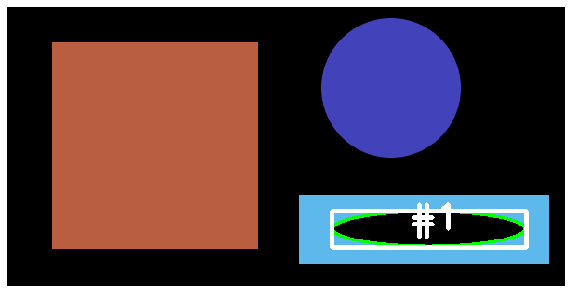

Contour #2


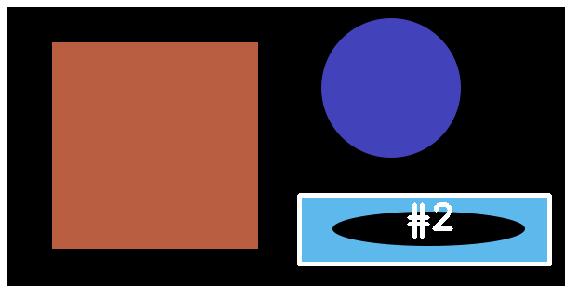

Contour #3


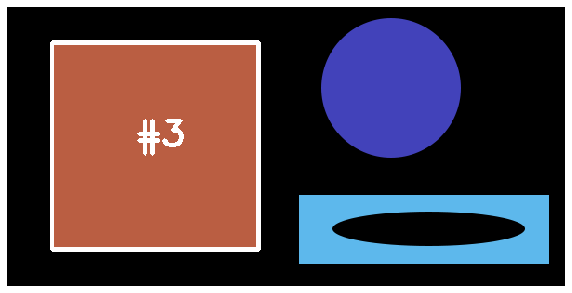

Contour #4


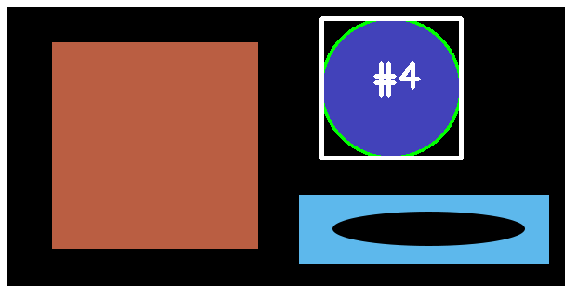

In [11]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    print("Contour #{}".format(i + 1))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(clone,(x,y),(x+w,y+h),(255,255,255),4)
    
    show_image(clone)

#### 1.2.5 Contour Minimum Enclosing Circles

Contour #1


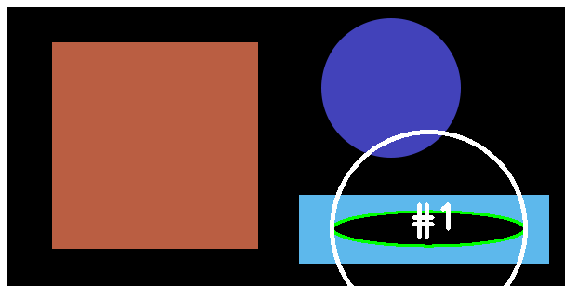

Contour #2


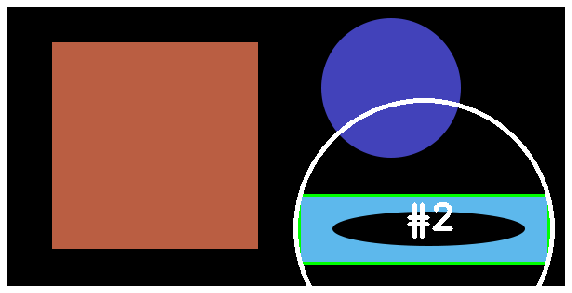

Contour #3


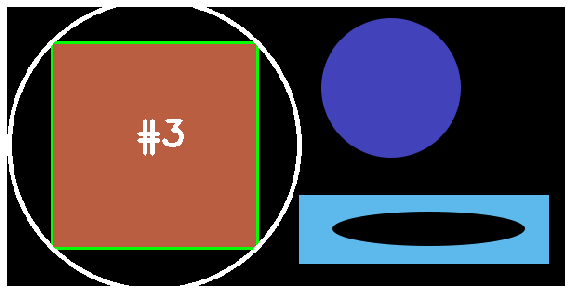

Contour #4


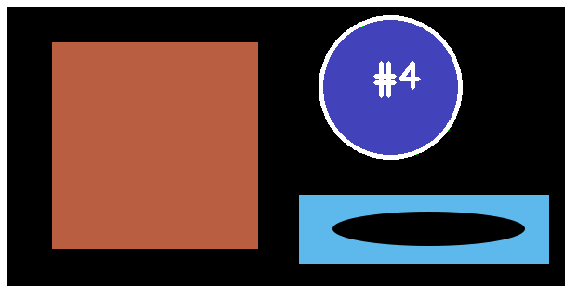

In [12]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    print("Contour #{}".format(i + 1))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    clone = cv2.circle(clone,center,radius,(255,255,255),4)
    
    show_image(clone)

#### 1.2.6 Fitting an Ellipse

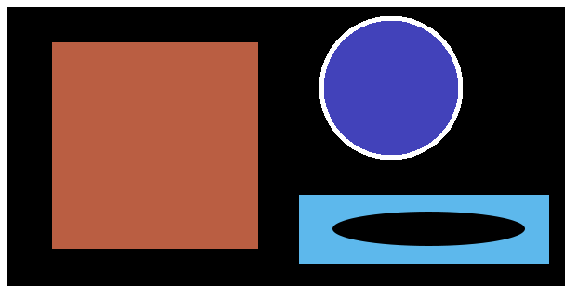

In [13]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

ellipse = cv2.fitEllipse(contours[3]) #contours[0] also work
cv2.ellipse(image,ellipse,(255,255,255),4)

show_image(image)



### EXERCISE: Fit a circle, bounding box and ellipse to objects of an image. What are their properties?

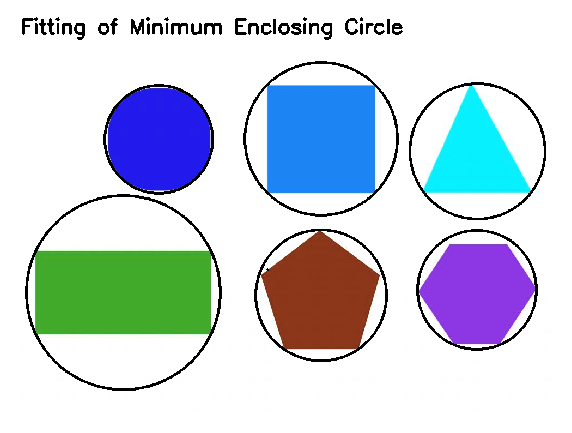

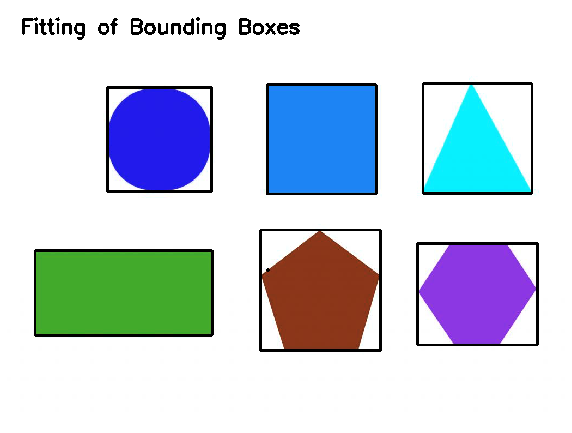

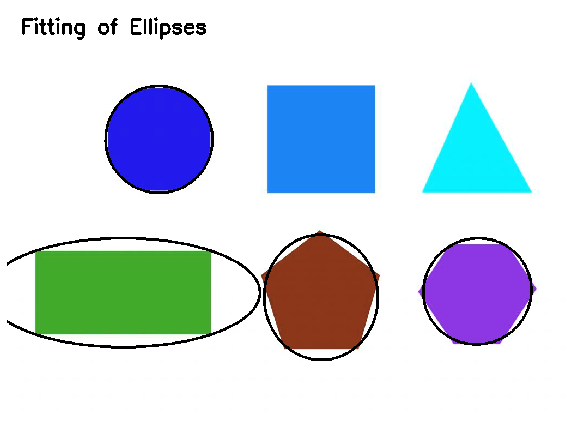

In [20]:
#image = np.flip(cv2.imread('../img/shapes.png'), axis =2 )
#show_image(image)


image = cv2.imread('../img/shapes.png')
grayimg = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grayimg,225,255,0)
contours = cv2.findContours(thresh, 3,4)[0] #cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]

 

## Fitting Minimum Enclosing Circles around objects 
clone_circ = image.copy()
# draw the contour on the image
#cv2.drawContours(clone_circ, contours, -1, (250, 200, 50), 4)

for i in range(1, len(contours)):    
    (x,y),radius = cv2.minEnclosingCircle(contours[i])
    center = (int(x),int(y))
    radius = int(radius)
    clone_circ = cv2.circle(clone_circ, center,radius,(0,0,0),4)

cv2.putText(clone_circ, "Fitting of Minimum Enclosing Circle", (25, 50), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0,0,0), 4)
show_image(clone_circ, fig_size=(10,8))


## Fitting Bound Boxes
clone_box = image.copy()
# draw the contour on the image
#cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)

for i in range(1, 8):
    x,y,w,h = cv2.boundingRect(contours[i])
    clone_box= cv2.rectangle(clone_box,(x,y),(x+w,y+h),(0,0,0),4)
cv2.putText(clone_box, "Fitting of Bounding Boxes", (25, 50), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0,0,0), 4)
show_image(clone_box, fig_size=(10,8))


## Fitting EllIPSES
clone_ellip = image.copy()
for i in range(2, 6):   #for ellipse to work, there needs at least 5 (data)points in the contour
    ellipse = cv2.fitEllipse(contours[i])
    cv2.ellipse(clone_ellip, ellipse,(0,0,0),4)
cv2.putText(clone_ellip, "Fitting of Ellipses", (25, 50), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0,0,0), 4)
show_image(clone_ellip, fig_size=(10,8))




### 1.3 Advanced Contour Features

#### 1.3.1 Aspect Ratio

Contour #1 -- aspect Ratio: 5.36


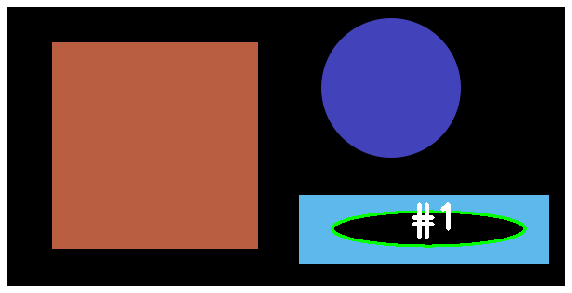

Contour #2 -- aspect Ratio: 3.64


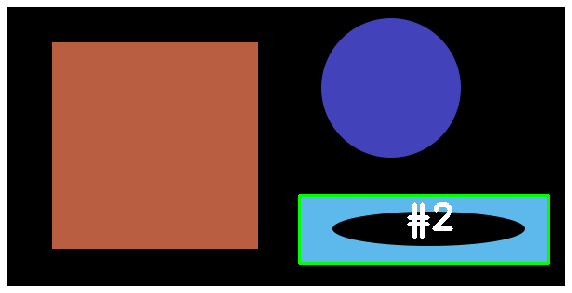

Contour #3 -- aspect Ratio: 1.00


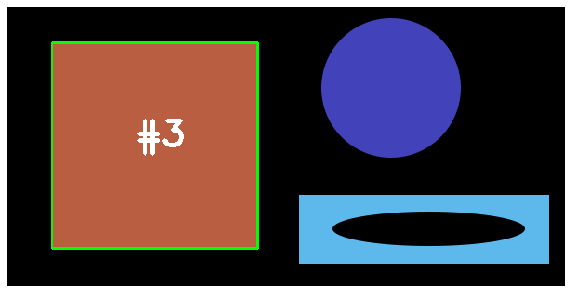

Contour #4 -- aspect Ratio: 1.00


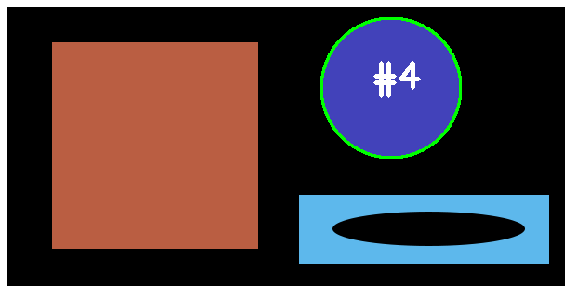

In [21]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # compute the area and the aspect ratio of the contour
    x,y,w,h = cv2.boundingRect(c)
    aspect_ratio = float(w)/float(h)
    print("Contour #{} -- aspect Ratio: {:.2f}".format(i + 1, aspect_ratio))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    show_image(clone)

#### 1.3.2 Extent

Contour #1 -- area: 6008.00, Rectangular area: 8151.00, extent: 0.74


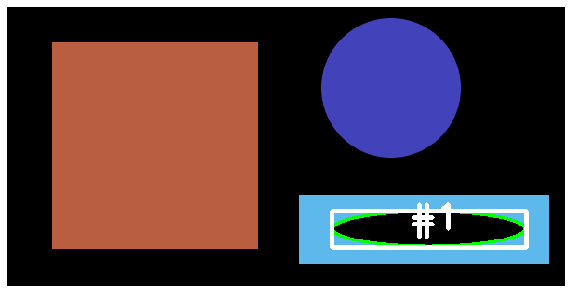

Contour #2 -- area: 19564.00, Rectangular area: 19906.00, extent: 0.98


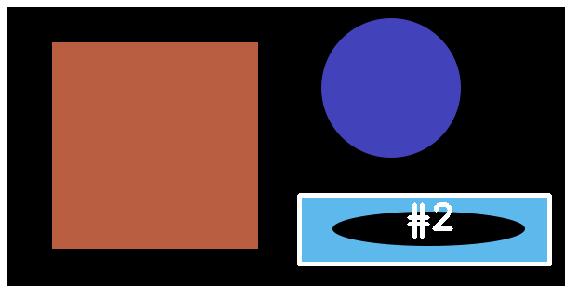

Contour #3 -- area: 48841.00, Rectangular area: 49284.00, extent: 0.99


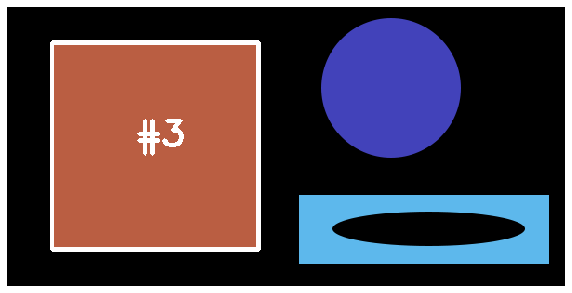

Contour #4 -- area: 17647.00, Rectangular area: 22500.00, extent: 0.78


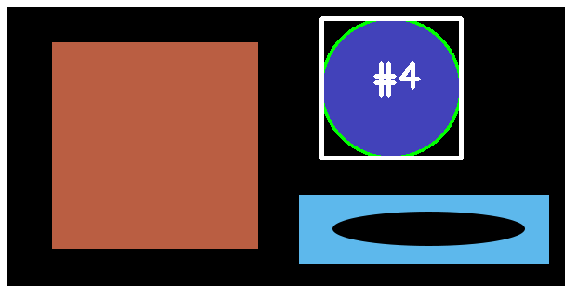

In [22]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # compute the area and the aspect ratio of the contour
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    rect_area = w*h
    extent = float(area)/float(rect_area)
    print("Contour #{} -- area: {:.2f}, Rectangular area: {:.2f}, extent: {:.2f}".format(i + 1, area, rect_area, extent))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(clone,(x,y),(x+w,y+h),(255,255,255),4)
    
    show_image(clone)

#### 1.3.3 Convexity

Contour #1 -- Convex: True


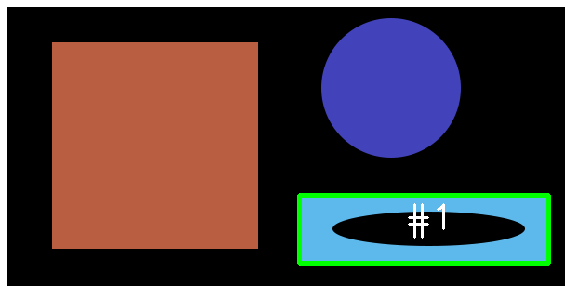

Contour #2 -- Convex: False


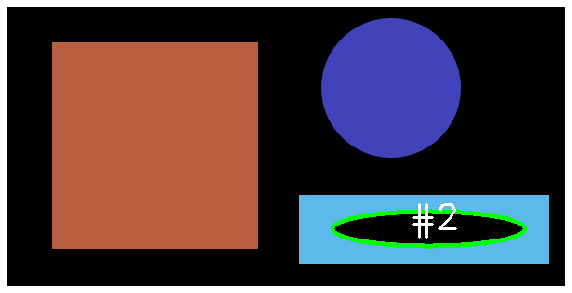

Contour #3 -- Convex: True


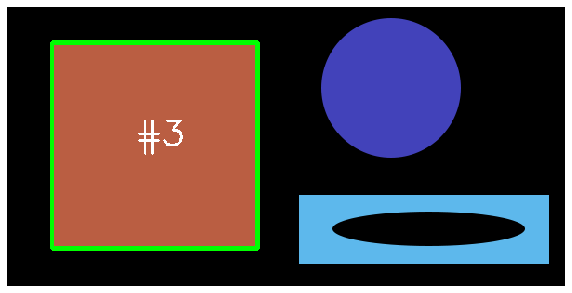

Contour #4 -- Convex: False


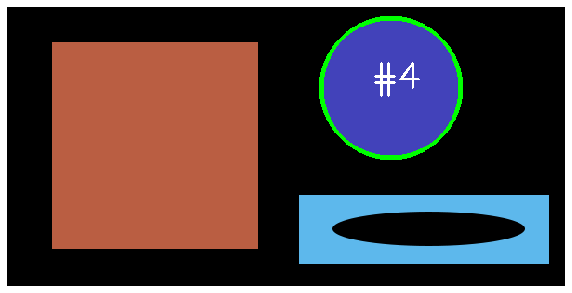

In [23]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # Check convexity
    is_convex = cv2.isContourConvex(c)
    print("Contour #{} -- Convex: {}".format(i + 1, is_convex))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 4)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 2)
    
    show_image(clone)

#### 1.3.4 Solidity

Contour #1 -- area: 3508.0, Hull Area: 4321.0, Solidity: 0.8118491090025457


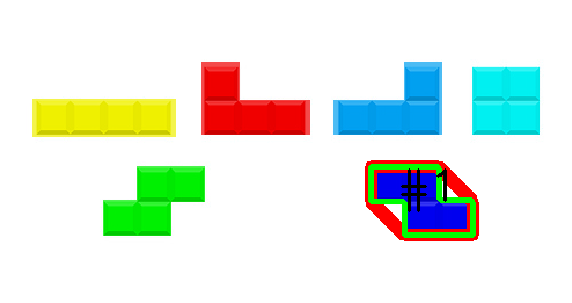

Contour #2 -- area: 3452.0, Hull Area: 4292.0, Solidity: 0.804287045666356


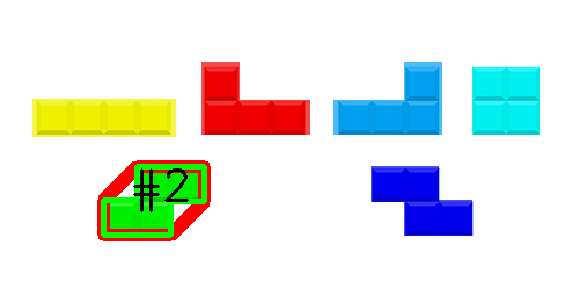

Contour #3 -- area: 3936.0, Hull Area: 3936.0, Solidity: 1.0


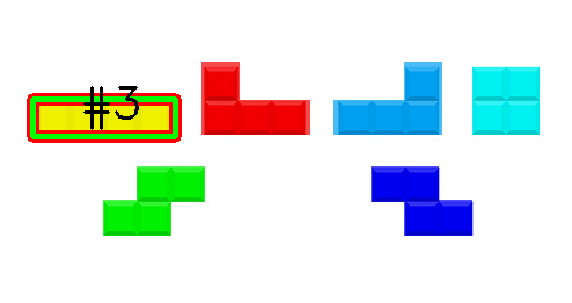

Contour #4 -- area: 3249.0, Hull Area: 3249.0, Solidity: 1.0


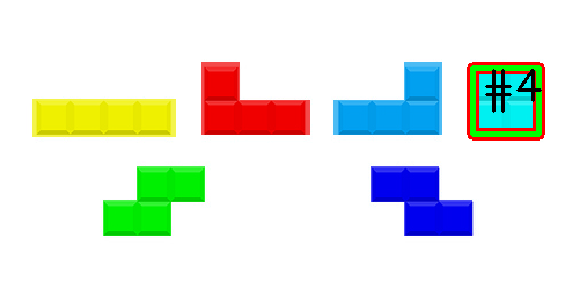

Contour #5 -- area: 3753.5, Hull Area: 4759.5, Solidity: 0.788633259796197


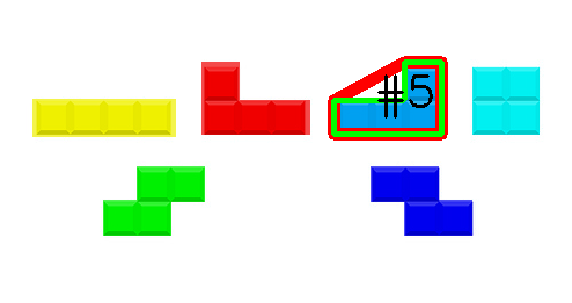

Contour #6 -- area: 3753.5, Hull Area: 4759.5, Solidity: 0.788633259796197


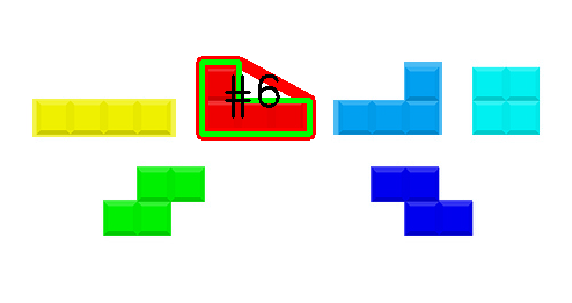

In [24]:
# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("../img/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    area = cv2.contourArea(c)
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/float(hull_area)
    
    # Check convexity
    print(f"Contour #{i+1} -- area: {area}, Hull Area: {hull_area}, Solidity: {solidity}")
 
    # draw the contour and hull on the image
    cv2.drawContours(clone, [hull], -1, 255, 10)
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 4)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 0, 0), 2)
    
    show_image(clone)

### 2. Identifying Shapes in Images using Contours

Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81
Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80
Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00
Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00
Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79
Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


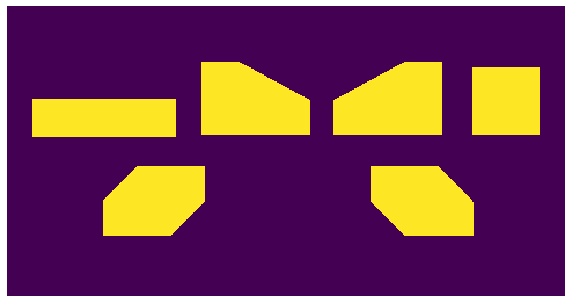

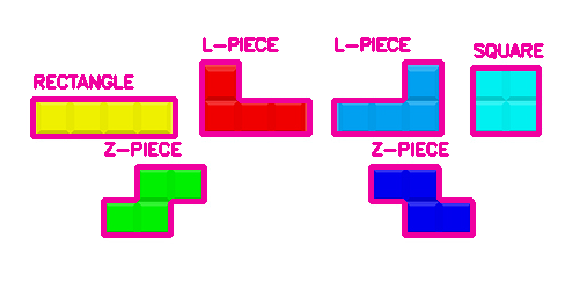

In [25]:
# load the Tetris block image, convert it to grayscale, and threshold
# the image
image = cv2.imread("../img/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
 
# show the original and thresholded images
#cv2.imshow("Original", image)
#cv2.imshow("Thresh", thresh)
 
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    
    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"

    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"

    # if the extent is sufficiently small, then we have a L-piece
    elif extent < 0.65:
        shape = "L-PIECE"

    # if the solidity is sufficiently large enough, then we have a Z-piece
    elif solidity > 0.80:
        shape = "Z-PIECE"

    # draw the shape name on the image
    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 2)

    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))


# show the output images
show_image(hullImage)
show_image(image)

### EXERCISE: Use contour properties to identify shape of objects in the following image

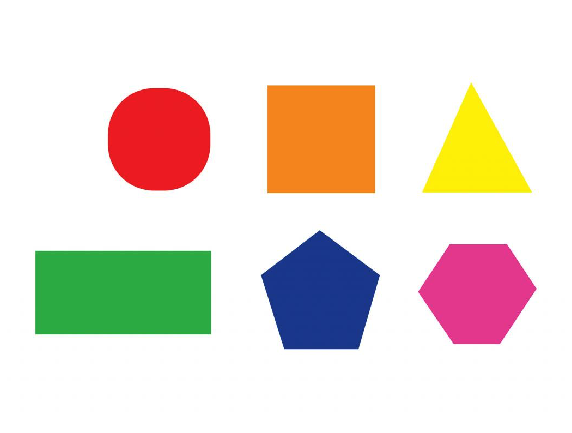

In [26]:
image = np.flip(cv2.imread("../img/shapes.png"), axis = 2)
show_image(image)

Contour #1 -- aspect_ratio=2.11, extent=0.99, solidity=1.00, is_convex=True
Contour #2 -- aspect_ratio=1.18, extent=0.71, solidity=0.99, is_convex=False
Contour #3 -- aspect_ratio=1.00, extent=0.69, solidity=0.99, is_convex=False
Contour #4 -- aspect_ratio=1.00, extent=0.82, solidity=0.99, is_convex=False
Contour #5 -- aspect_ratio=1.00, extent=0.99, solidity=1.00, is_convex=True
Contour #6 -- aspect_ratio=1.00, extent=0.49, solidity=0.98, is_convex=False


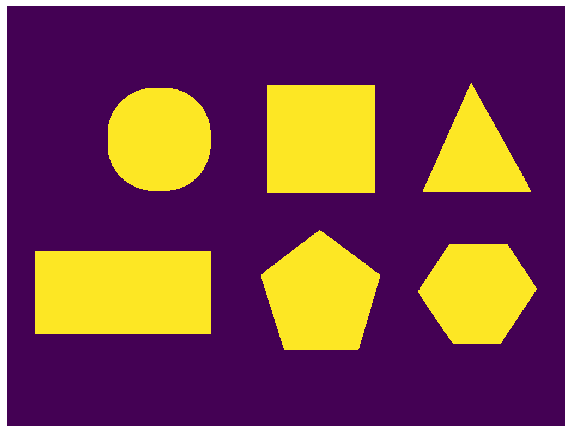

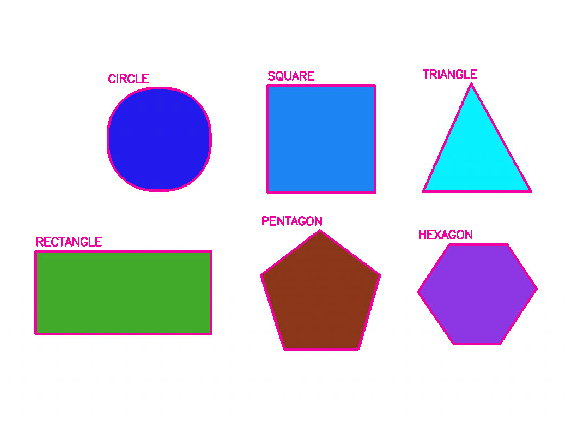

In [27]:
# TODO: Your code below

# load the image, convert it to grayscale, and threshold
# the raw image
image = cv2.imread("../img/shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)[1]
 

# find external contours in the thresholded image and allocate memory
# for the convex hull image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

# loop over the contours
for (i, c) in enumerate(contours):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = float(w) / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = float(area) / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # check if the contour is convex or not (# circle and eclipse are not)    
    is_convex = cv2.isContourConvex(c)

    
    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    
    
    
    # if the width is 2x longer than the height, then we have a rectangle
    if aspectRatio >= 2:
        shape = "RECTANGLE"
             
    # if the extent is sufficiently small, then we have a TRIANGLE
    elif extent < 0.60:
        shape = "TRIANGLE"
        
    # if the aspect ratio and extent are approximately one, then the shape is a square
    elif aspectRatio >= 0.95 and extent > 0.95:
        shape = "SQUARE"

    # if the extent is relatively large, >0.8, then it is a circle
    elif extent > 0.80:
        shape = "CIRCLE"
           
    elif aspect_ratio >= 0.95 and extent <=0.7:
        shape = "PENTAGON"

    else:
        shape = "HEXAGON"
        

    # draw the shape name on the image
    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
        (240, 0, 159), 2)
        
    #cv2.putText(image, "#{}".format(i + 1), (x, y+50), cv2.FONT_HERSHEY_SIMPLEX,
    #    0.75, (0, 0, 0), 2)
    
    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}, is_convex={}"
        .format(i + 1, aspectRatio, extent, solidity, is_convex))
    

# show the output images
show_image(hullImage)
show_image(image)


### 1.4 Contour Retrieval Modes

RETR_LIST


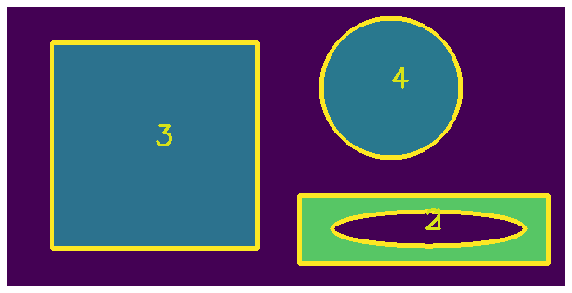

RETR_EXTERNAL


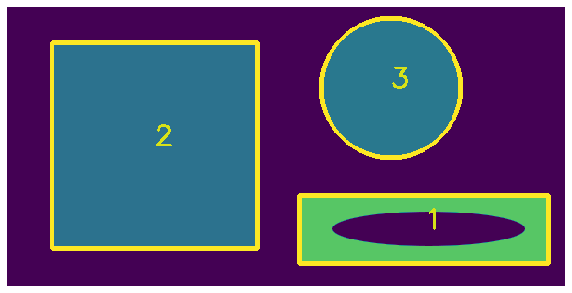

RETR_CCOMP


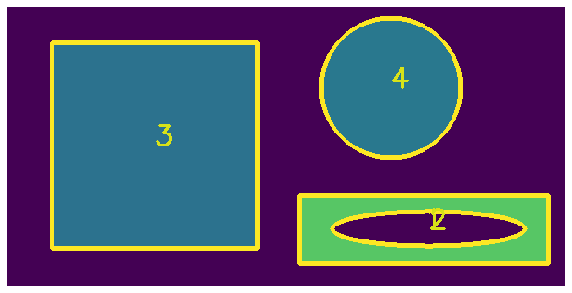

RETR_TREE


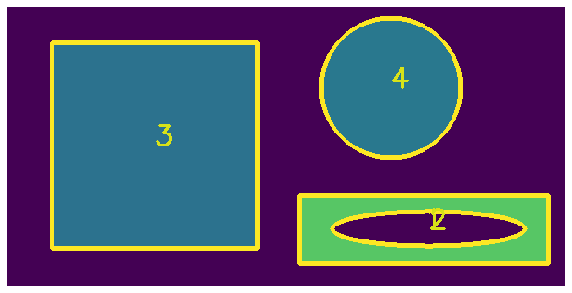

In [28]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)

contour_retrieval_modes = [cv2.RETR_LIST, cv2. RETR_EXTERNAL, cv2.RETR_CCOMP, cv2.RETR_TREE]
names = ['RETR_LIST', 'RETR_EXTERNAL', 'RETR_CCOMP', 'RETR_TREE']

for rm, name in zip(contour_retrieval_modes, names):
    img = gray.copy()
    contours = cv2.findContours(thresh,rm,cv2.CHAIN_APPROX_SIMPLE)[0]
    
    for (i, c) in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(c)
        
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        cv2.drawContours(img, [c], -1, (255, 255, 255), 4)
        
        
        # draw the shape name on the image
        cv2.putText(img, str(i+1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (240, 0, 159), 2)
    
    print(name)
    show_image(img)

### PROJECT: Identify Xs and Os in the tic tac toe board

O (Contour #1) -- aspect_ratio=1.10, extent=0.49,solidity=0.98
X (Contour #2) -- aspect_ratio=1.17, extent=0.49,solidity=0.60
O (Contour #3) -- aspect_ratio=1.10, extent=0.49,solidity=0.98
X (Contour #4) -- aspect_ratio=1.17, extent=0.49,solidity=0.60
X (Contour #5) -- aspect_ratio=1.17, extent=0.49,solidity=0.60
O (Contour #6) -- aspect_ratio=1.10, extent=0.49,solidity=0.98
?? (Contour #7) -- aspect_ratio=1.06, extent=0.49,solidity=0.28


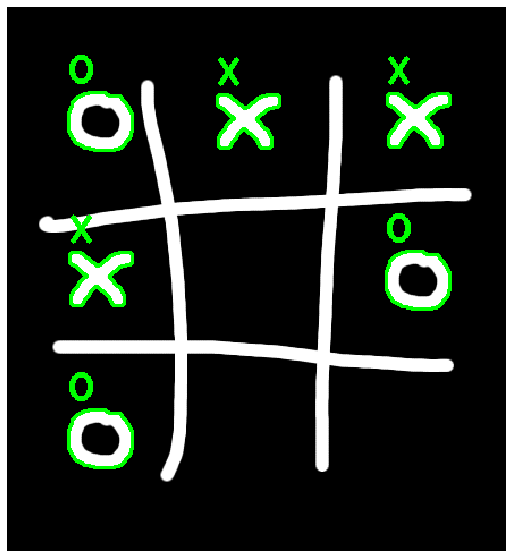

In [29]:
#image = np.flip(cv2.imread("../img/tictactoe.png"), axis = 2)
#show_image(image)


img = cv2.imread("../img/tictactoe.png")
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# find all contours on the tic-tac-toe board
contours = cv2.findContours(grayimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

clone = img.copy()
# loop over the contours
for (i, c) in enumerate(contours):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    
    aspectRatio = float(w) / float(h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # initialize an empty string
    symbol = ""

    # if the solidity is high, then we are examining an `O`
    if solidity > 0.95:
        symbol = "O"

    # otherwise, if the solidity it still reasonabably high, we
    # are examining an `X`
    elif solidity > 0.5:
        symbol = "X"
        
    else:
        symbol = "??"

    # if the symbol is not unknown, draw it
    if symbol != "??":
        cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
        cv2.putText(clone, symbol, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1,
            (0, 255, 0), 4)

    # show the contour properties
    print("{} (Contour #{}) -- aspect_ratio={:.2f}, extent={:.2f},solidity={:.2f}"
          .format(symbol, i + 1, aspectRatio, extent, solidity))

show_image(clone)




In [2]:
#Solutions
%load ../solutions/tic-tac-toe.py

### PROJECT: Use contour properties to identify licence plate in images

In [30]:
image = np.flip(cv2.imread("../img/licence_plate_raw.png"), axis = 2)
#show_image(image)

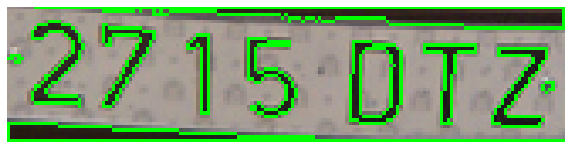

Contour #2 -- aspect_ratio=1.67, extent=0.33, solidity=0.91
Contour #Z -- aspect_ratio=0.71, extent=0.32, solidity=0.39
Contour #T -- aspect_ratio=0.67, extent=0.23, solidity=0.40
Contour #D -- aspect_ratio=0.64, extent=0.82, solidity=0.97
Contour #5 -- aspect_ratio=0.62, extent=0.28, solidity=0.36
Contour #2 -- aspect_ratio=0.29, extent=0.34, solidity=0.59
Contour #7 -- aspect_ratio=0.64, extent=0.25, solidity=0.43
Contour #2 -- aspect_ratio=0.62, extent=0.31, solidity=0.38


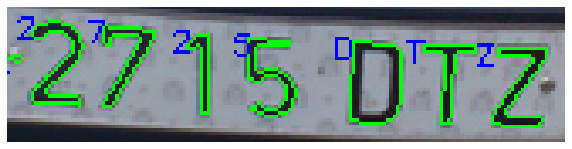

In [31]:
# TODO: Your code below

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

image = np.flip(cv2.imread("../img/licence_plate_raw.png"), axis=2)


img = image[245:285, 305:470]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

adapt_thresh = cv2.adaptiveThreshold(gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 55, 5)
#show_image(thresh, cmap = 'gray')


ret,thresh = cv2.threshold(adapt_thresh,120,180,0)
contours = cv2.findContours(thresh, cv2.RETR_LIST, 1)[0] 
#in the latest version of cv2, there are only two properties in findcontours (i.e. contours, hierarchy)


clone = img.copy()
clone = cv2.drawContours(clone, contours, -1, (0,255,0), 1)
show_image(np.flip(clone, axis=2))


clone2 = img.copy()
for i, c in enumerate(contours):
    
    # compute the area of the contour along with the bounding box to compute the aspect ratio
    area = cv2.contourArea(contours[i])
    (x, y, w, h) = cv2.boundingRect(contours[i])

    # compute the aspect ratio of the contour, which is simply the width divided 
    # by the height of the bounding box
    aspectRatio = float(w) / float(h)

    # use the area of the contour and the bounding box area to compute the extent
    extent = float(area) / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the solidity
    hull = cv2.convexHull(contours[i])
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # check if the contour is convex or not   
    #is_convex = cv2.isContourConvex(contours[i])
    
    # initialize an empty string
    text = ""

    # if the aspect ration & solidity is low, then we are examining an `1`
    if aspectRatio <= 0.32 and solidity <0.15:
        text = "1"

    # To examine an 'Z'
    elif aspectRatio >= 0.7 and aspectRatio < 1:
        text = "Z"
        
    # To examine an 'D'
    elif extent >= 0.8 and solidity > 0.5:
        text = "D"
        
    # To examine an '2'
    elif extent >= 0.3 and extent < 0.4 and solidity > 0.2:
        text = "2"        
        
    # To examine an 'T'
    elif aspectRatio > 0.65 and aspectRatio < 1 and extent < 0.25:
        text = "T"        
    
    # To examine an '5'
    elif aspectRatio > 0.6 and aspectRatio < 1 and extent > 0.25:
        text = "5"      

    # To examine an '7'
    elif aspectRatio > 0.62 and aspectRatio < 1 and extent <0.28:
        text = "7"      
    
    else: 
        text = "?"

    # if the character is not unknown, draw it
    if text != "?":
        cv2.drawContours(clone2, [c], -1, (0, 255, 0), 1)
        cv2.putText(clone2, text, (x-5, y +5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

        # show the contour properties
        print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}".format(text, aspectRatio, extent, solidity))


show_image(clone2)

